In [1]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
import numpy as np
import pandas as pd
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# checking for nulls
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# dropping unwanted columns which are not required for analysis

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [7]:
# mapping variables with values for certain columns

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<Axes: xlabel='season', ylabel='cnt'>

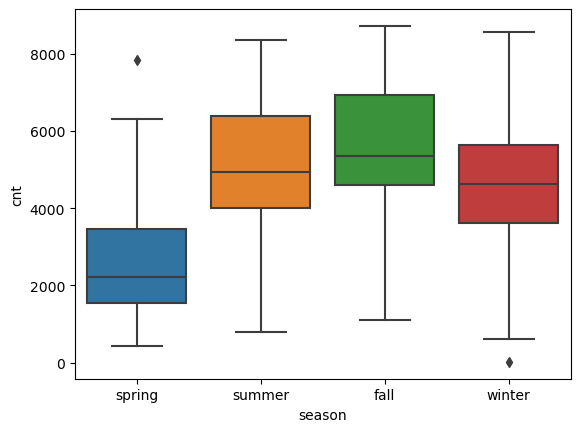

In [9]:
# Plotting boxplots between target variables and independent variables to observe trends
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = 'season', y = 'cnt', data = bike)

<Axes: xlabel='mnth', ylabel='cnt'>

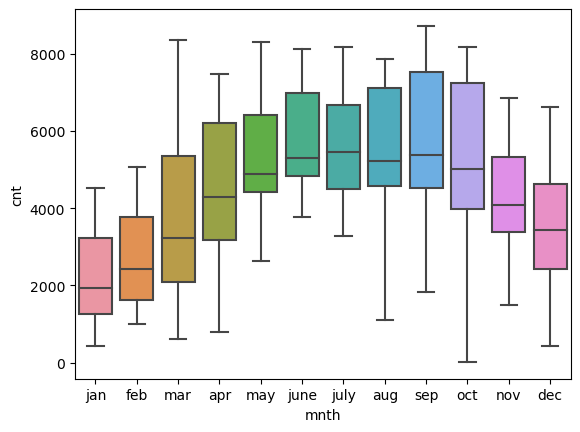

In [10]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)

<Axes: xlabel='weathersit', ylabel='cnt'>

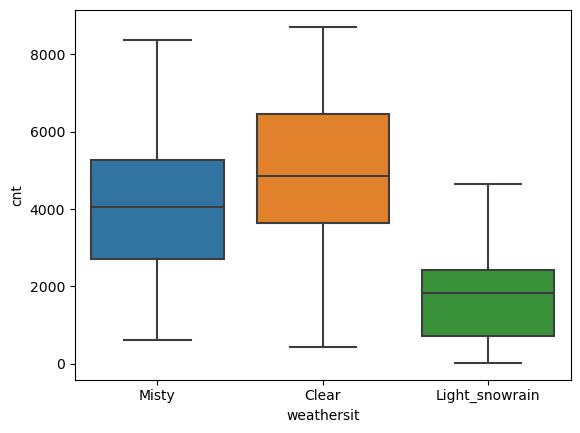

In [11]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

<Axes: xlabel='holiday', ylabel='cnt'>

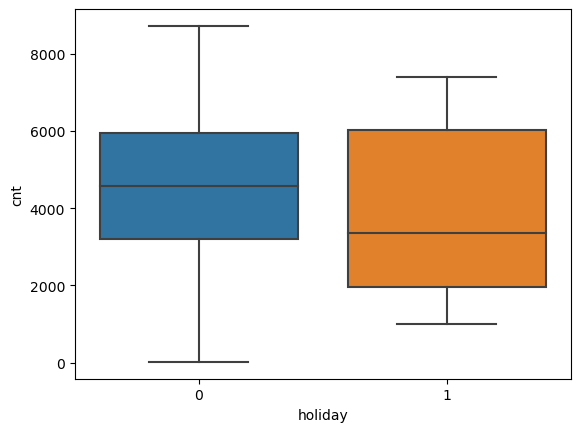

In [12]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)


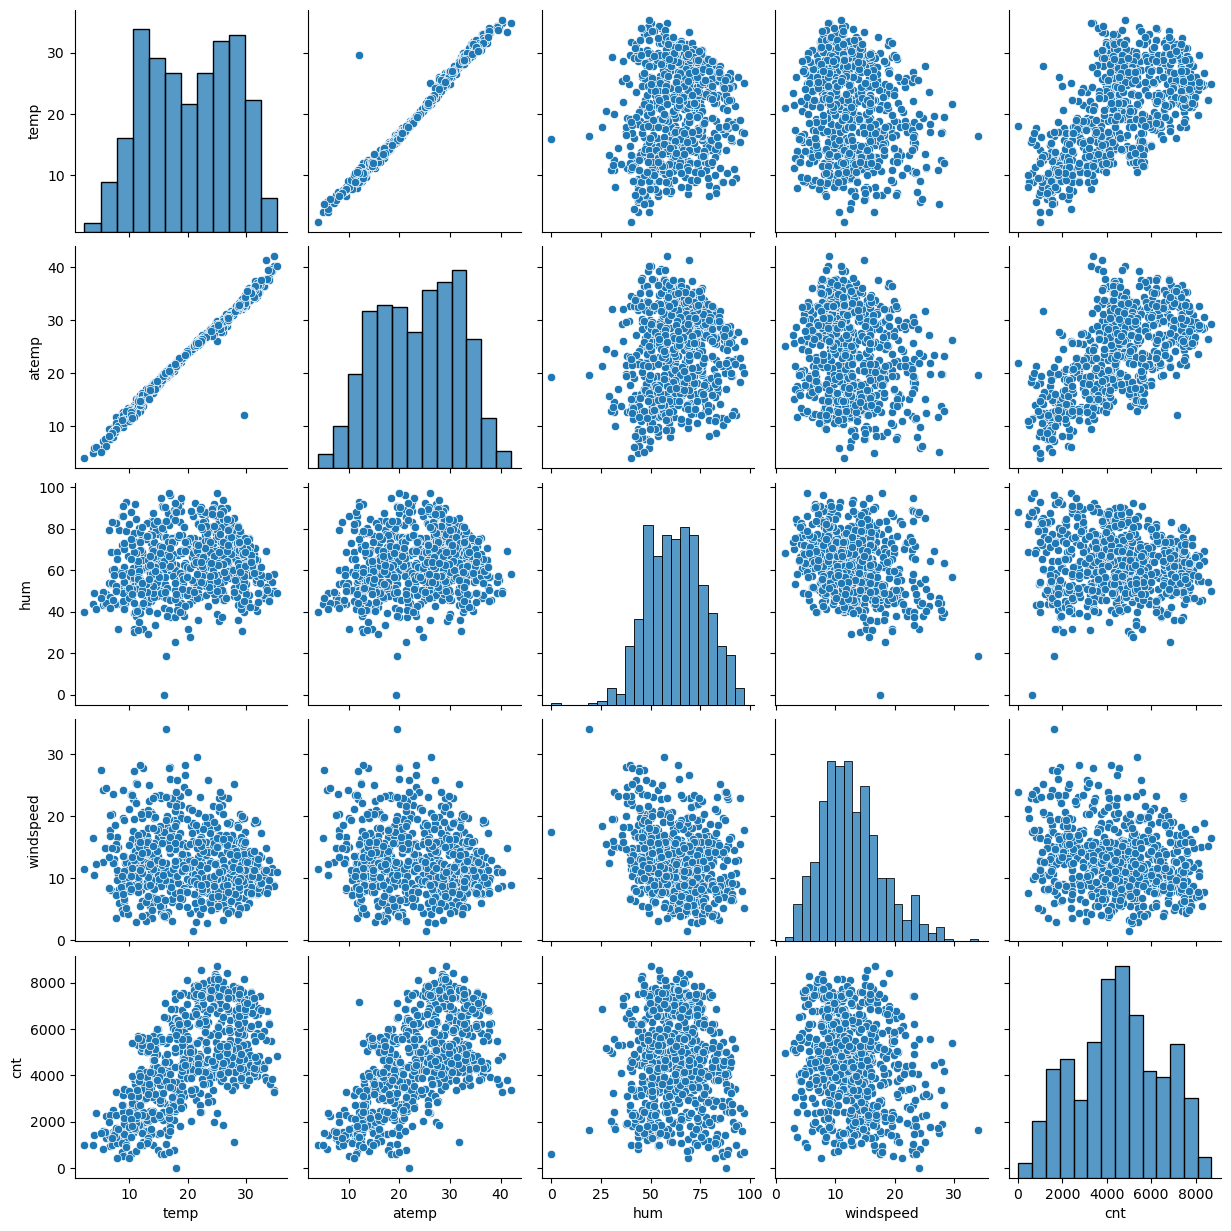

In [13]:
# Analysing all the relationships 

sns.pairplot(data=bike,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

<Axes: xlabel='season', ylabel='cnt'>

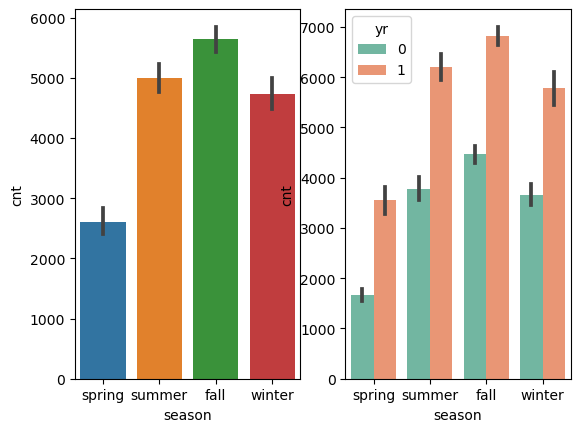

In [14]:
plt.subplot(1,2,1)
sns.barplot(x='season',y='cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(x='season',y='cnt',data=bike, hue='yr',palette='Set2')

<Axes: xlabel='mnth', ylabel='cnt'>

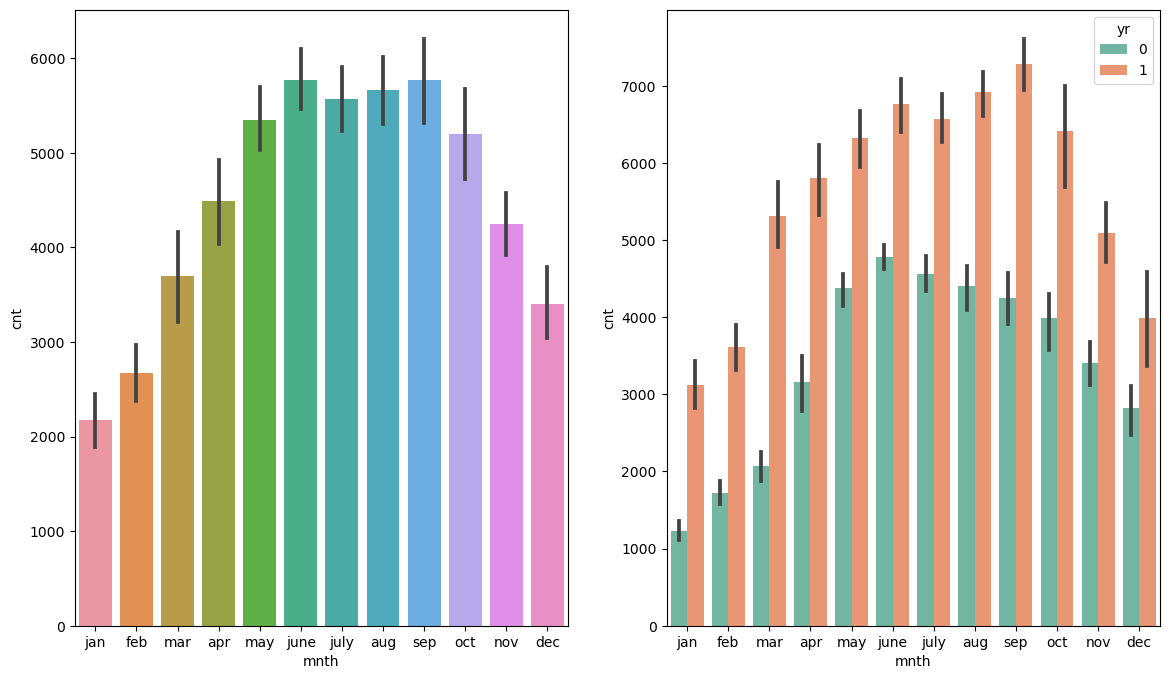

In [22]:
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
sns.barplot(x='mnth',y='cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(x='mnth',y='cnt',data=bike, hue='yr',palette='Set2')

<Axes: xlabel='holiday', ylabel='cnt'>

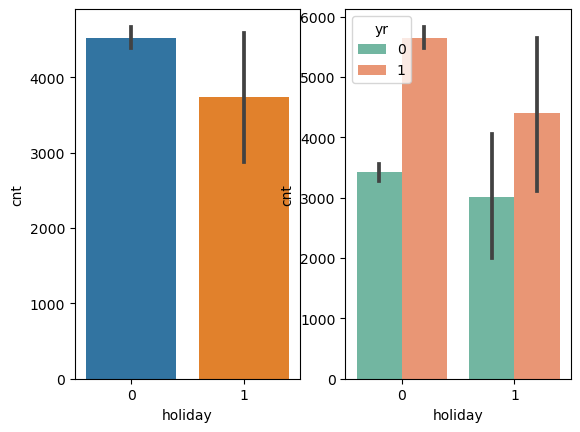

In [15]:
plt.subplot(1,2,1)
sns.barplot(x='holiday',y='cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(x='holiday',y='cnt',data=bike, hue='yr',palette='Set2')

Text(0.5, 1.0, 'Correlation between indepedent variables')

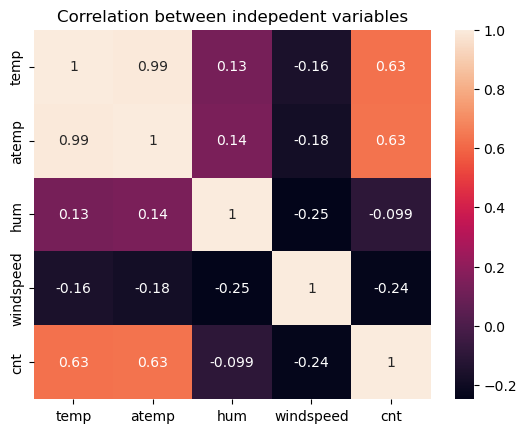

In [16]:
# Plotting heat map to look at any existing correlation 

sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.title("Correlation between indepedent variables")

There seems to be a linear correlation between temp and atemp variables
Based on VIF we can decide which to use as both will cause multi-colinearity
Now next step is to create dummy variables for the categorical data

# Data preparation

In [17]:
monthvalue_bike=pd.get_dummies(bike.mnth,drop_first=True)
weekdaysvalue_bike=pd.get_dummies(bike.weekday,drop_first=True)
weathersitvalue_bike=pd.get_dummies(bike.weathersit,drop_first=True)
seasonsvalue_bike=pd.get_dummies(bike.season,drop_first=True)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Now merge the dummy variables with bike data
bike_updated = pd.concat([bike,monthvalue_bike,weekdaysvalue_bike,weathersitvalue_bike,seasonsvalue_bike],axis=1)

bike_updated.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [19]:
# We can drop older categorical variables now 

bike_updated.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [20]:
bike_updated.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


# Forming training and testing data set

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

bike_train, bike_test = train_test_split(bike_updated, train_size = 0.7,test_size=0.3, random_state = 100)

In [33]:
bike_train.shape

(510, 30)

In [34]:
bike_test.shape

(219, 30)

In [35]:
# Now we have to bring values to scale

scaler = MinMaxScaler()

bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0


In [36]:
# Apply scaling to all excpet dummy and categorical variables

numerical_bike = ['temp','atemp','hum','windspeed','cnt']
bike_train[numerical_bike] = scaler.fit_transform(bike_train[numerical_bike])

In [37]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


<Axes: >

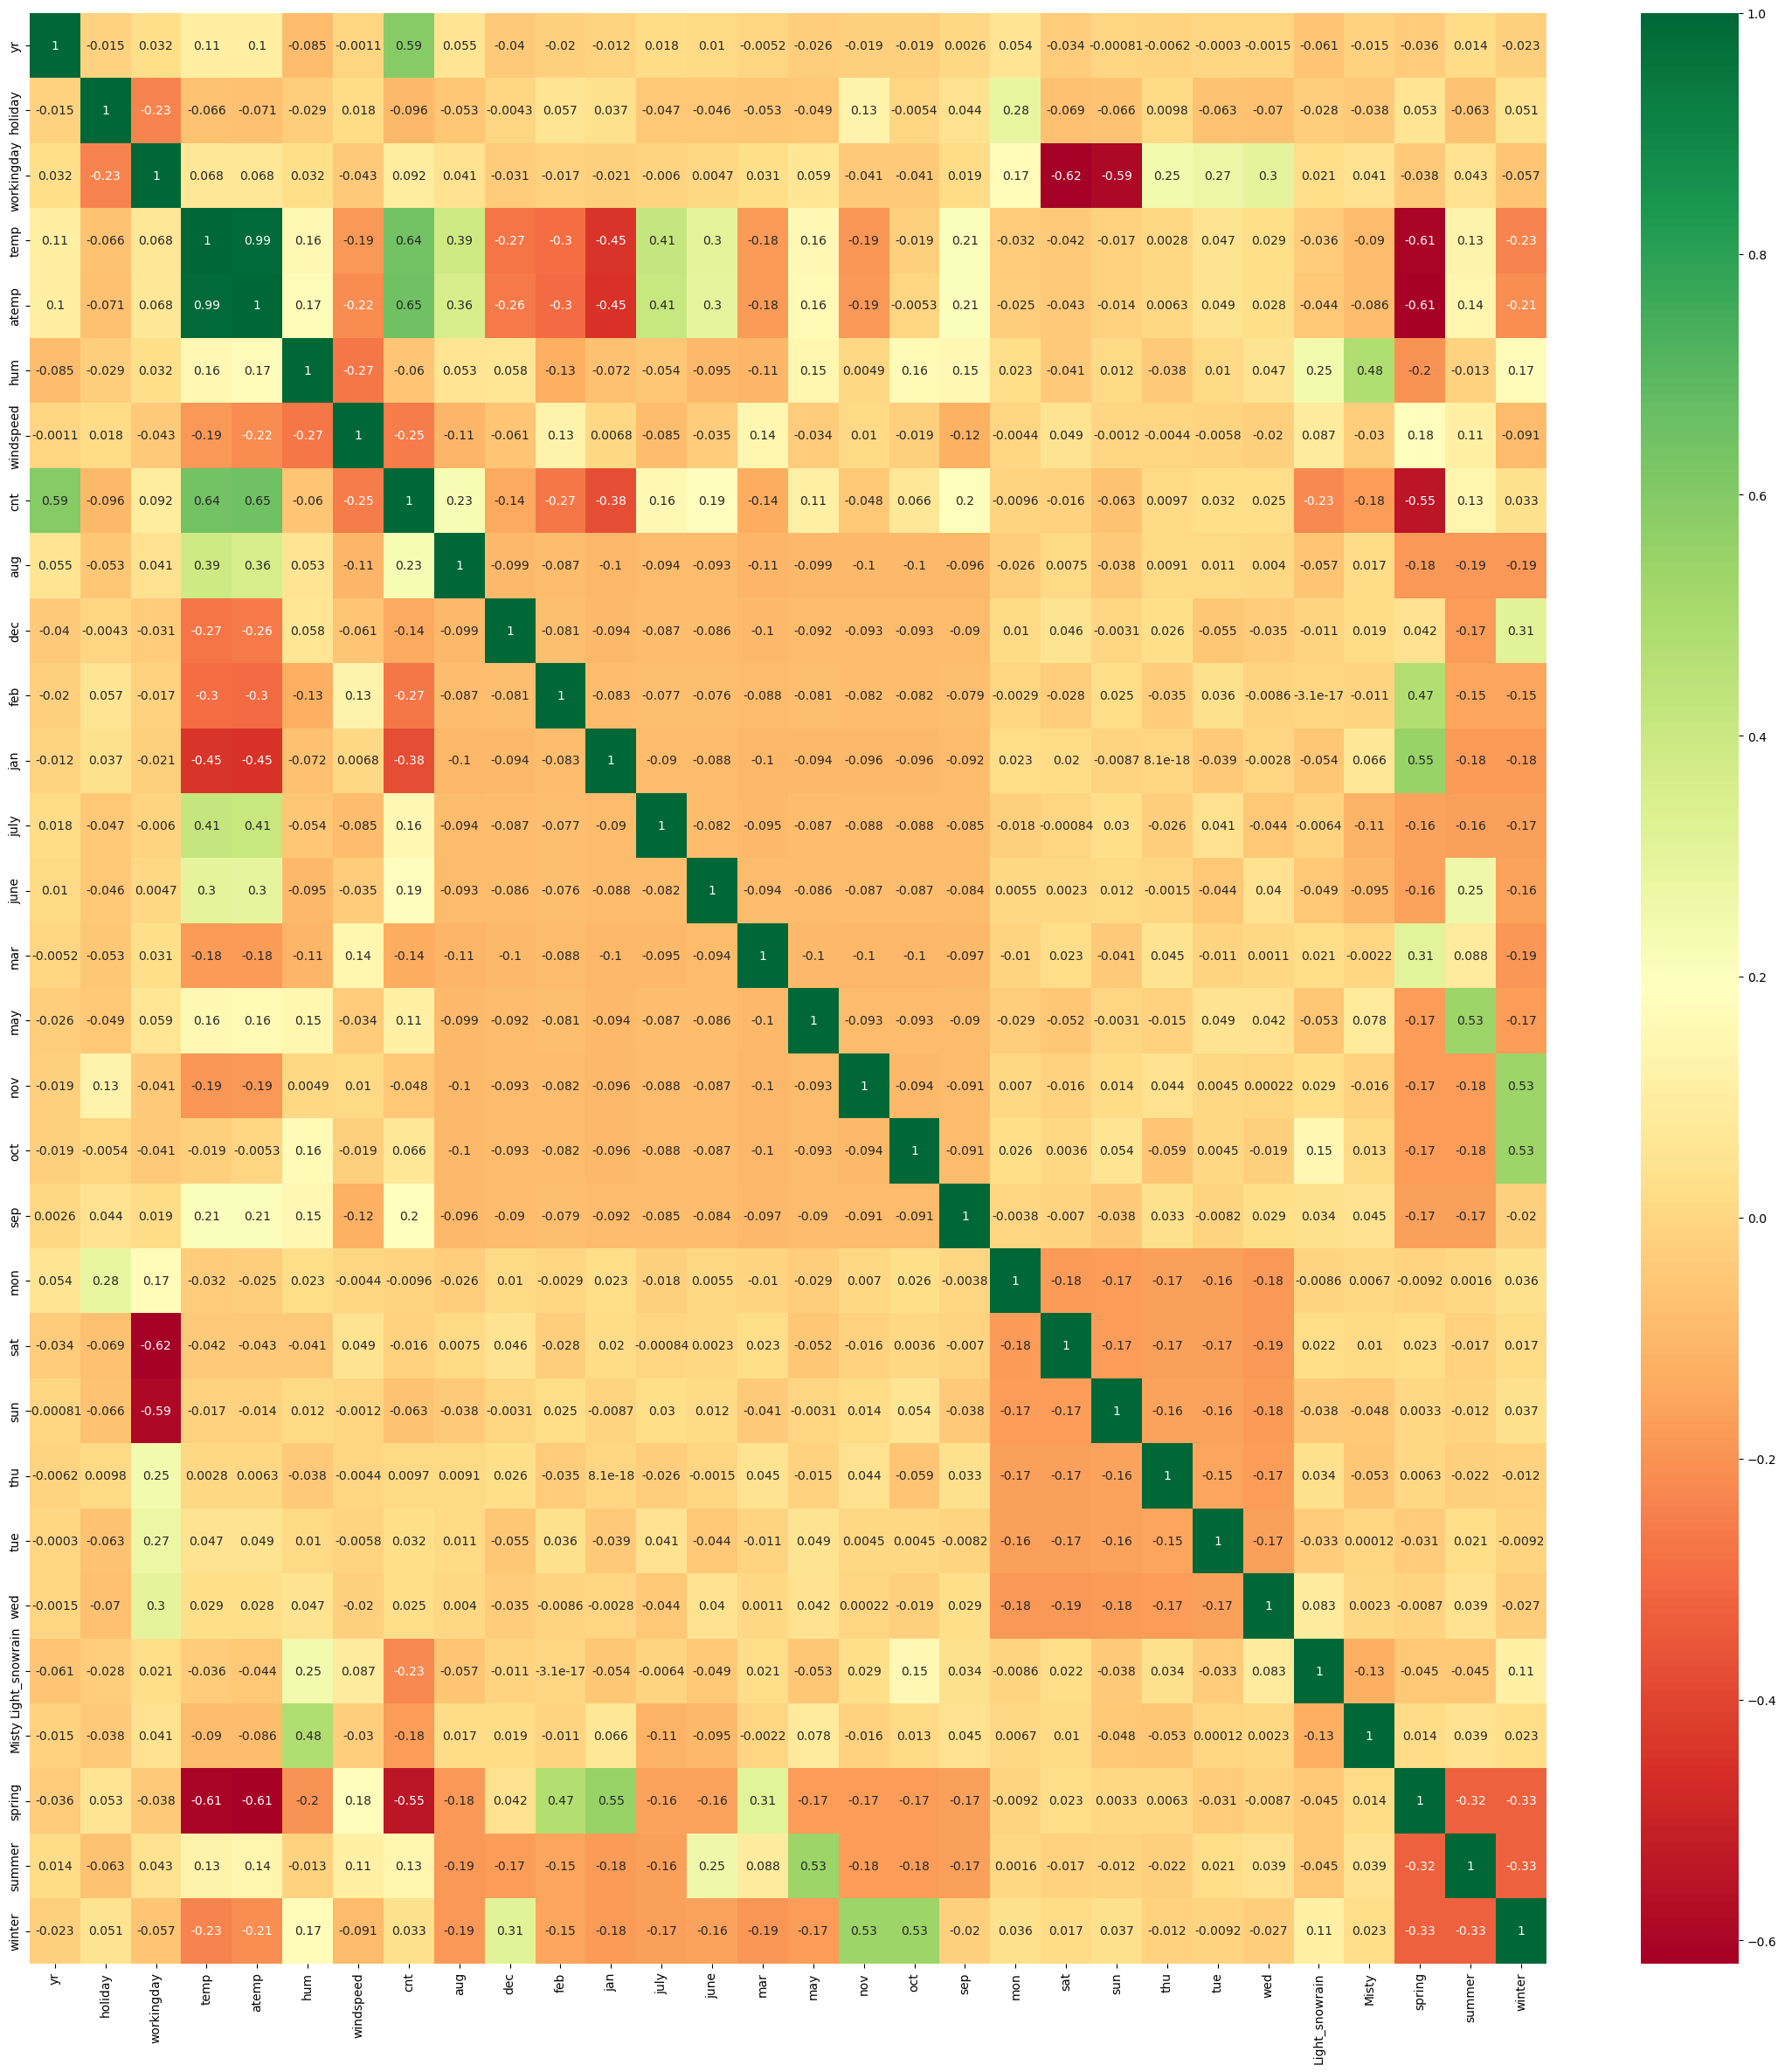

In [38]:
# Trying to understand the relationships in training data set

plt.figure(figsize = (28,29))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn")

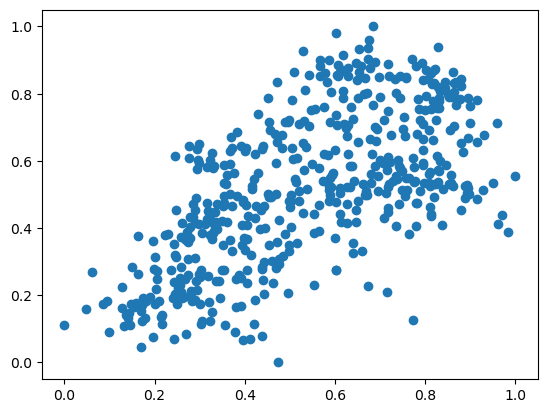

In [39]:
plt.scatter(bike_train.temp, bike_train.cnt)

In [40]:
# Now we start building the model

Y_train = bike_train.pop('cnt')
X_train = bike_train

In [48]:
#rfe = RFE(lm)
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm,n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, Y_train)


In [49]:
columns_bike = X_train.columns[(rfe.get_support())]
print(columns_bike)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [50]:
# dataframe with RFE selected variables

X_train_rfe = X_train[columns_bike]

In [51]:
# Calculate VIF
vif_bike_data = pd.DataFrame()
vif_bike_data["variable"] = X_train_rfe.columns
  

vif_bike_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i)
                          for i in range(len(X_train_rfe.columns))]
  
print(vif_bike_data)

          variable        VIF
0               yr   1.034657
1          holiday   2.907801
2       workingday  50.688207
3             temp   3.615608
4              hum   1.910052
5        windspeed   1.195997
6             july   1.487435
7              sep   1.296535
8              sat  12.198436
9              sun  11.786247
10  Light_snowrain   1.249846
11           Misty   1.572205
12          spring   5.018673
13          summer   2.614621
14          winter   3.493578


## Model building

In [52]:
# Now build the reg model

X_biketrain_lm = sm.add_constant(X_train_rfe)
lr_bike_1 = sm.OLS(Y_train,X_biketrain_lm).fit()
print(lr_bike_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.13e-191
Time:                        15:19:05   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.028      7.

In [54]:
# From above VIF calculation we can drop workingday
X_train_1 = X_train_rfe.drop(['workingday'], axis = 1)

# Calculate VIF
vif_bike_data = pd.DataFrame()
vif_bike_data["variable"] = X_train_1.columns
  

vif_bike_data["VIF"] = [variance_inflation_factor(X_train_1.values, i)
                          for i in range(len(X_train_1.columns))]
  
print(vif_bike_data)

          variable        VIF
0               yr   2.077513
1          holiday   1.056029
2             temp  16.056935
3              hum  28.280187
4        windspeed   4.678306
5             july   1.588040
6              sep   1.385701
7              sat   1.230135
8              sun   1.228330
9   Light_snowrain   1.244069
10           Misty   2.299998
11          spring   4.032983
12          summer   2.781600
13          winter   3.369401


In [55]:
# Humididty is also showing high VIF which we can look at after running the second model

# Build 2nd model

X_biketrain_lm_1 = sm.add_constant(X_train_1)
lr_bike_2 = sm.OLS(Y_train,X_biketrain_lm_1).fit()
print(lr_bike_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.13e-191
Time:                        15:26:09   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2826      0.034      8.

In [56]:
#Dropping humidity from the dataset

# From above VIF calculation we can drop workingday
X_train_2 = X_train_1.drop(['hum'], axis = 1)

# Calculate VIF
vif_bike_data = pd.DataFrame()
vif_bike_data["variable"] = X_train_2.columns
  

vif_bike_data["VIF"] = [variance_inflation_factor(X_train_2.values, i)
                          for i in range(len(X_train_2.columns))]
  
print(vif_bike_data)

          variable       VIF
0               yr  2.068545
1          holiday  1.055537
2             temp  5.179356
3        windspeed  4.623188
4             july  1.588040
5              sep  1.337331
6              sat  1.229991
7              sun  1.218755
8   Light_snowrain  1.083681
9            Misty  1.549568
10          spring  2.132127
11          summer  2.227408
12          winter  1.841249


In [57]:
# Now all VIF values look good so let us build the next model

X_biketrain_lm_2 = sm.add_constant(X_train_2)
lr_bike_3 = sm.OLS(Y_train,X_biketrain_lm_2).fit()
print(lr_bike_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          5.73e-189
Time:                        15:30:53   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2039      0.029      6.

In [58]:
#p-value of Sat is very high so we can remove Sat 

X_train_2 = X_train_2.drop(['sat'], axis = 1)


# Calculate VIF
vif_bike_data = pd.DataFrame()
vif_bike_data["variable"] = X_train_2.columns
  

vif_bike_data["VIF"] = [variance_inflation_factor(X_train_2.values, i)
                          for i in range(len(X_train_2.columns))]
  
print(vif_bike_data)

          variable       VIF
0               yr  2.067116
1          holiday  1.047879
2             temp  5.137316
3        windspeed  4.599290
4             july  1.586693
5              sep  1.336705
6              sun  1.179995
7   Light_snowrain  1.083660
8            Misty  1.549377
9           spring  2.106065
10          summer  2.222464
11          winter  1.818711


##Do not see much change or any drastic variations in VIF after dropping variables so we can continue refining the model



In [59]:
X_biketrain_lm_3 = sm.add_constant(X_train_2)
lr_bike_4 = sm.OLS(Y_train,X_biketrain_lm_3).fit()
print(lr_bike_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          6.45e-190
Time:                        15:41:10   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2063      0.029      7.

In [60]:
#p-value of jul is very high so we can remove jul

X_train_2 = X_train_2.drop(['july'], axis = 1)

# Calculate VIF
vif_bike_data = pd.DataFrame()
vif_bike_data["variable"] = X_train_2.columns
  

vif_bike_data["VIF"] = [variance_inflation_factor(X_train_2.values, i)
                          for i in range(len(X_train_2.columns))]
  
print(vif_bike_data)

          variable       VIF
0               yr  2.066339
1          holiday  1.047758
2             temp  3.906232
3        windspeed  4.594318
4              sep  1.229126
5              sun  1.177842
6   Light_snowrain  1.083302
7            Misty  1.546928
8           spring  2.017151
9           summer  1.897102
10          winter  1.659886


In [61]:
X_biketrain_lm_4 = sm.add_constant(X_train_2)
lr_bike_5 = sm.OLS(Y_train,X_biketrain_lm_4).fit()
print(lr_bike_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 17 Sep 2023   Prob (F-statistic):          1.51e-189
Time:                        15:46:18   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1983      0.029      6.

# Looks like all colinearity is removed as no other variables show very high p values and R2 value is also good 
## Hence we can stop at this as the final training model

In [62]:
lr_bike_5.params

const             0.198266
yr                0.233911
holiday          -0.104837
temp              0.478564
windspeed        -0.148080
sep               0.089297
sun              -0.049628
Light_snowrain   -0.291333
Misty            -0.082226
spring           -0.054078
summer            0.061227
winter            0.098268
dtype: float64

In [63]:
# Normality of all error

y_train_pred = lr_bike_5.predict(X_biketrain_lm_4)



<Axes: ylabel='Density'>

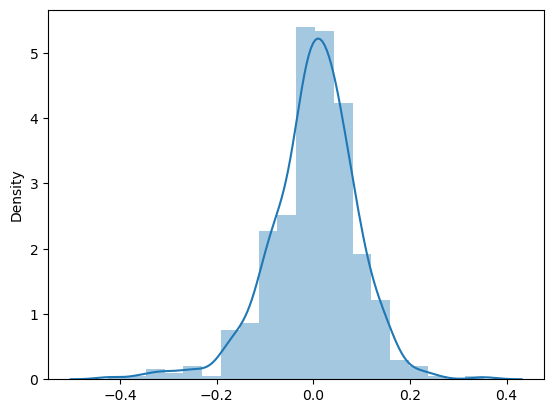

In [64]:
fig = plt.figure()
sns.distplot((Y_train - y_train_pred), bins = 20)

<Axes: >

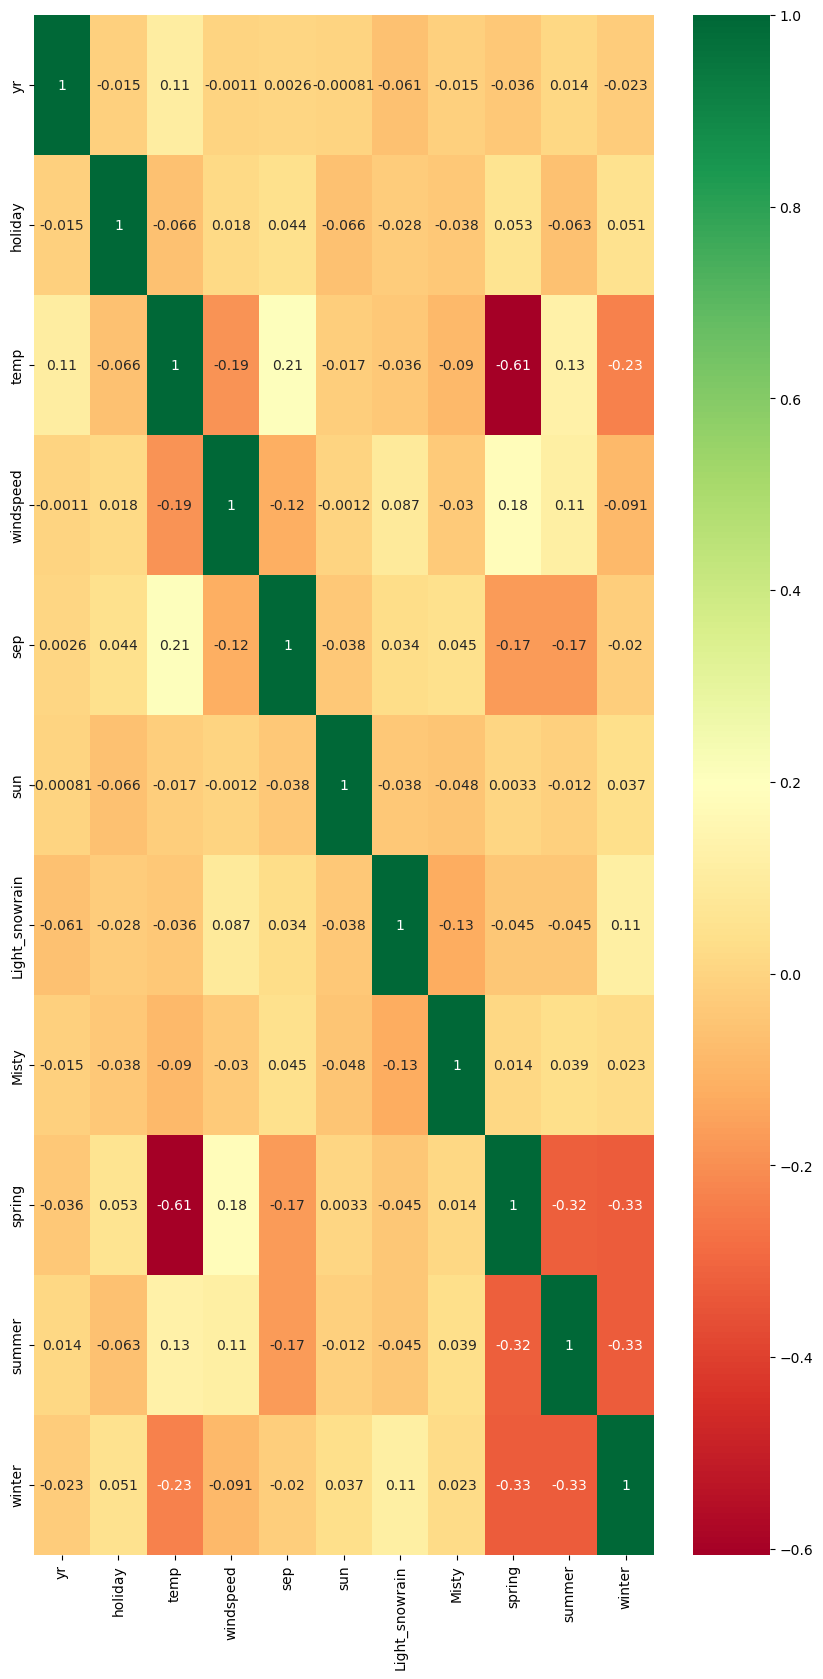

In [65]:

plt.figure(figsize = (10,20))
sns.heatmap(X_train_2.corr(), annot = True, cmap="RdYlGn")

## Confirming there is no multi colinearity using heat maps like done before
## Nothing in the green area 

## Predictions can now be made using test data 

Predicting using the finalized model

In [66]:
# Scaling the variables for testing data

numerical_bike = ['temp','atemp','hum','windspeed','cnt']
bike_test[numerical_bike] = scaler.transform(bike_test[numerical_bike])
bike_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [67]:
# Now we start the test evaluation

Y_test = bike_test.pop('cnt')
X_test = bike_test

In [68]:
column_names = X_train_2.columns

X_test = X_test[column_names]

X_biketest_lm_5 = sm.add_constant(X_test)

In [69]:
# Final prediction and model evaluation 
y_pred = lr_bike_5.predict(X_biketest_lm_5)

In [75]:
from sklearn.metrics import r2_score
r2_score_bike = r2_score(Y_test, y_pred)
print(r2_score_bike)

0.8059746366971767


# Test data has a similar R2 score as train data 

Training data R2 score - 0.839

Testing data R2 score -   0.805

In [76]:
adjusted_r2 = 1-(1-r2_score_bike)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)
print(adjusted_r2)

0.7956641101448527


Training data adjusted R2 score - 0.836

Testing data adjusted R2 score - 0.795